# HA1 (Advanced Macro)

Anastasia Mikheeva & Irina Rumyantseva

## Problem 1

In [220]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels. tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
import numpy as np
import random

In [164]:
GDP = pd.read_excel('GDP.xls', skiprows = 10)
GDP

,observation_date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
298,2021-07-01,23550.420
299,2021-10-01,24349.121
300,2022-01-01,24740.480
301,2022-04-01,25248.476


In [289]:
GDP[(GDP['observation_date']<'2020-01-01')]

,observation_date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
287,2018-10-01,20819.269
288,2019-01-01,21013.085
289,2019-04-01,21272.448
290,2019-07-01,21531.839


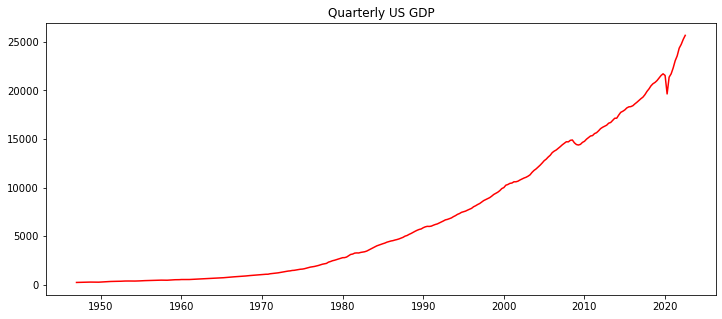

In [313]:
fig, ax = plt.subplots()

plt.subplot()
plt.title('Quarterly US GDP')
fig.set_figwidth(12)    
fig.set_figheight(5)


plt.plot(GDP['observation_date'],GDP['GDP'], color = 'r')

Text(0.5, 1.0, 'Trend of log-GDP')

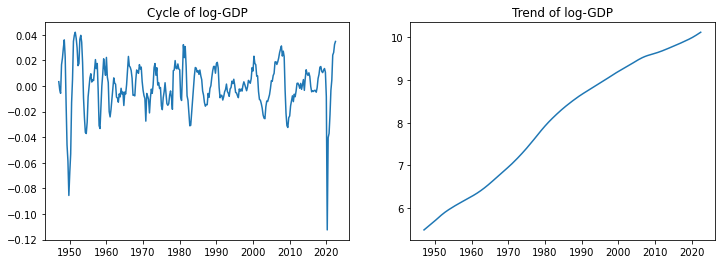

In [312]:
gdp_cycle,gdp_trend = hpfilter(np.log(GDP['GDP']), lamb=1600)

fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121) 
plt.plot(GDP['observation_date'], gdp_cycle)
plt.title('Cycle of log-GDP')

plt.subplot(122) 
plt.plot(GDP['observation_date'], gdp_trend)
plt.title('Trend of log-GDP')

In [314]:
adfuller(gdp_cycle)

(-8.150069983708876,
 9.749916325105911e-13,
 11,
 291,
 {'1%': -3.4530232710482367,
  '5%': -2.871523926671883,
  '10%': -2.5720897694878424},
 -1810.231951491217)

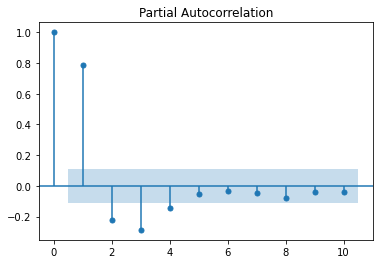

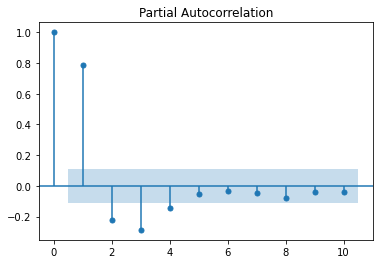

In [304]:
plot_pacf(gdp_cycle, lags=10)

In [315]:
ar_model = AutoReg(gdp_cycle, lags=2).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [316]:
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:              GDP_cycle   No. Observations:                  303
Model:                     AutoReg(2)   Log Likelihood                 928.406
Method:               Conditional MLE   S.D. of innovations              0.011
Date:                Sun, 27 Nov 2022   AIC                             -8.980
Time:                        22:24:15   BIC                             -8.931
Sample:                             2   HQIC                            -8.960
                                  303                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     7.132e-05      0.001      0.112      0.911      -0.001       0.001
GDP_cycle.L1     0.9709      0.056     17.261      0.000       0.861       1.081
GDP_cycle.L2    -0.2226      0.057     -3.93

## Problem 3

1) Computing the parameters for 150 periods (permanent negative 1% shock)

In [18]:
y_list = [0] # list for values of y_t, y_0 = 0
w_list = [0]
l_list = [0]
c_list = [0]
i_list = [0]
r_list = [0]

k_list = [0]

In [19]:
k_previous = 0

for i in range(150):
    k_current = 563/575*k_previous - 51/28750
    k_list.append(k_current)
    
    y_current = 19/69*k_current - 4/345
    y_list.append(y_current)
    
    w_current = 50/207*k_current - 49/5175
    w_list.append(w_current)
    
    l_current = 7/207*k_current - 11/5175
    l_list.append(l_current)
    
    c_current = 11/69*k_current - 47/8625
    c_list.append(c_current)
    
    i_current = 15/23*k_current - 17/575
    i_list.append(i_current)
    
    r_current = -5/69*k_current - 2/1725
    r_list.append(r_current)
    
    k_previous = k_current
    

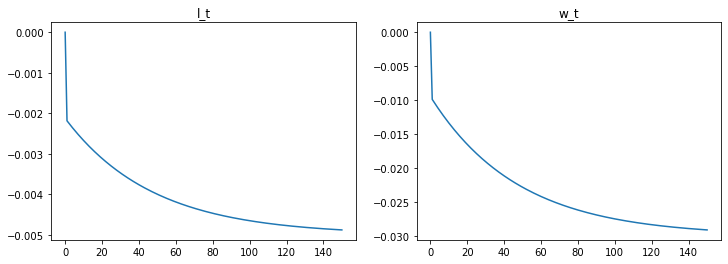

In [318]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(l_list)
plt.title('l_t')

plt.subplot(122)  
plt.plot(w_list)
plt.title('w_t')


plt.show()

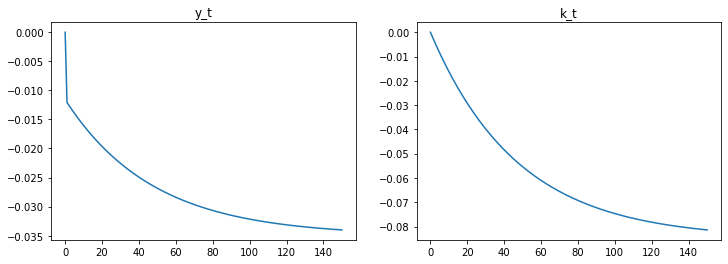

In [319]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(y_list)
plt.title('y_t')

plt.subplot(122)  
plt.plot(k_list)
plt.title('k_t')


plt.show()

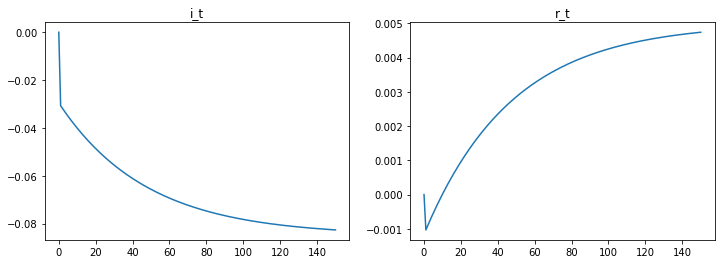

In [321]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(i_list)
plt.title('i_t')

plt.subplot(122)  
plt.plot(r_list)
plt.title('r_t')


plt.show()

Text(0.5, 1.0, 'c_t')

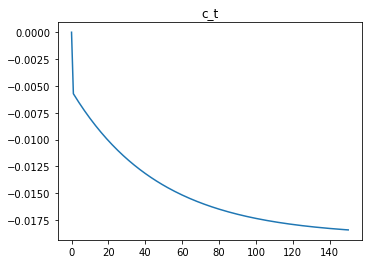

In [322]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(c_list)
plt.title('c_t')


In [106]:
y_list_tr = [0] # list for values of y_t, y_0 = 0
w_list_tr = [0]
l_list_tr = [0]
c_list_tr = [0]
i_list_tr = [0]
r_list_tr = [0]

k_list_tr = [0]

In [107]:
# a_0 = 0, a_1 = -0.01

k_1 = 102/575*(-0.01) + 563/575*0
y_1 = 80/69*(-0.01) + 19/69*k_1
w_1 = 196/207*(-0.01) + 50/207*k_1
l_1 = 44/207*(-0.01) + 7/207*k_1
c_1 = 188/345*(-0.01) + 11/69*k_1
i_1 = 68/23*(-0.01) + 15/23*k_1
r_1 = 8/69*(-0.01) - 5/69*k_1

k_list_tr.append(k_1)
y_list_tr.append(y_1)
w_list_tr.append(w_1)
l_list_tr.append(l_1)
c_list_tr.append(c_1)
i_list_tr.append(i_1)
r_list_tr.append(r_1)

k_previous = k_1

for i in range(149):
    k_current = 563/575*k_previous
    k_list_tr.append(k_current)
    
    y_current = 19/69*k_current
    y_list_tr.append(y_current)
    
    w_current = 50/207*k_current
    w_list_tr.append(w_current)
    
    l_current = 7/207*k_current
    l_list_tr.append(l_current)
    
    c_current = 11/69*k_current
    c_list_tr.append(c_current)
    
    i_current = 15/23*k_current
    i_list_tr.append(i_current)
    
    r_current = -5/69*k_current
    r_list_tr.append(r_current)
    
    k_previous = k_current
    

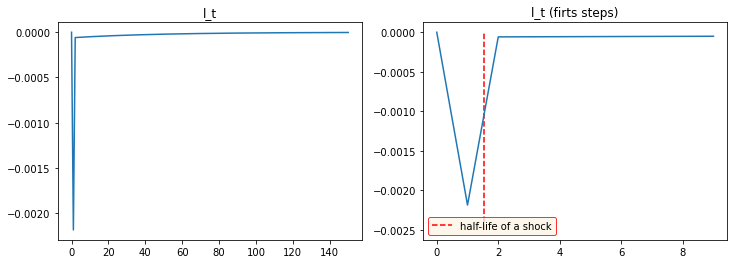

In [349]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(l_list_tr)
plt.title('l_t')

plt.subplot(122)  
plt.plot(l_list_tr[:10])
plt.vlines(1.55, ymin = -0.0025, ymax = 0, linestyle='dashed', color ='r', label = 'half-life of a shock')
plt.title('l_t (firts steps)')
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
         )


plt.show()

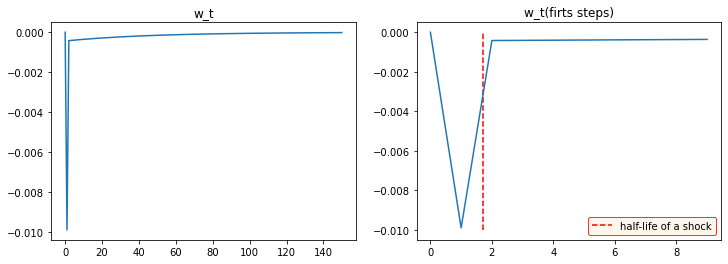

In [356]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(w_list_tr)
plt.title('w_t')

plt.subplot(122)  
plt.plot(w_list_tr[:10])
plt.vlines(1.7, ymin = -0.01, ymax = 0, linestyle='dashed', color ='r', label = 'half-life of a shock')
plt.title('w_t(firts steps)')
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
         )


plt.show()

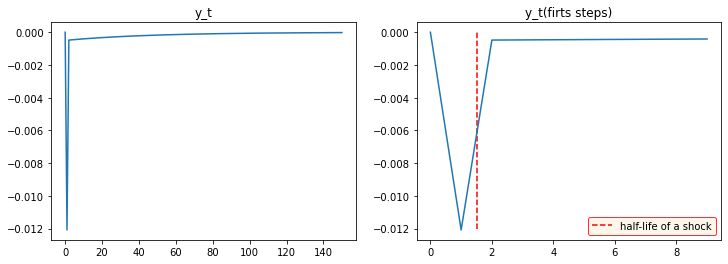

In [359]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(y_list_tr)
plt.title('y_t')

plt.subplot(122)  
plt.plot(y_list_tr[:10])
plt.vlines(1.5, ymin = -0.012, ymax = 0, linestyle='dashed', color ='r', label = 'half-life of a shock')
plt.title('y_t(firts steps)')
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
         )


plt.show()

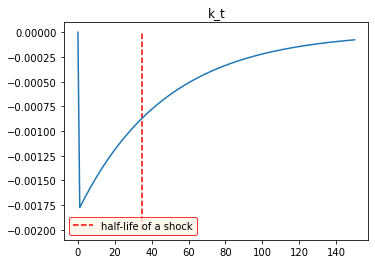

In [369]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(k_list_tr)
plt.vlines(35, ymin = -0.002, ymax = 0, linestyle='dashed', color ='r', label = 'half-life of a shock')
plt.title('k_t')
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
         )


plt.show()

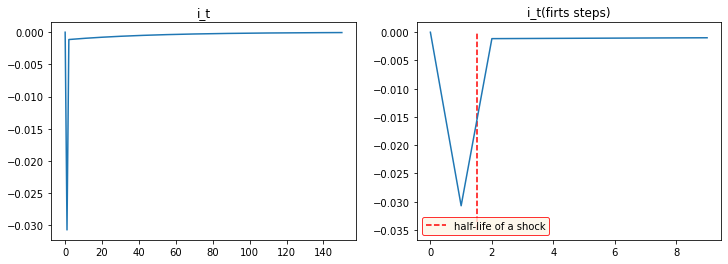

In [374]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(i_list_tr)
plt.title('i_t')

plt.subplot(122)  
plt.plot(i_list_tr[:10])
plt.vlines(1.5, ymin = -0.035, ymax = 0, linestyle='dashed', color ='r', label = 'half-life of a shock')
plt.title('i_t(firts steps)')
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
         )


plt.show()

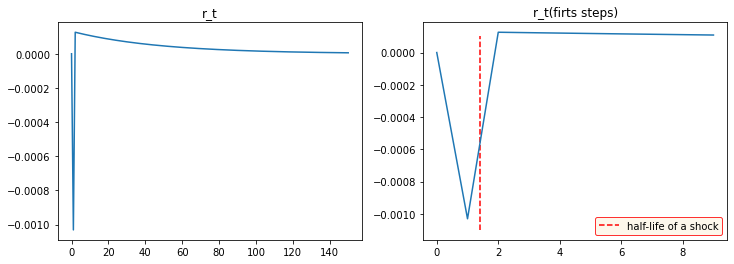

In [382]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(r_list_tr)
plt.title('r_t')

plt.subplot(122)  
plt.plot(r_list_tr[:10])
plt.vlines(1.4, ymin = -0.0011, ymax = 0.0001, linestyle='dashed', color ='r', label = 'half-life of a shock')
plt.title('r_t(firts steps)')
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
         )


plt.show()

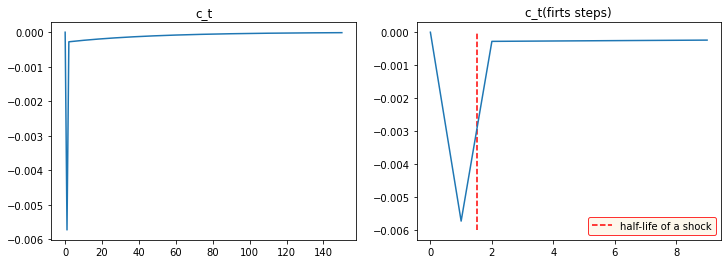

In [386]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(c_list_tr)
plt.title('c_t')

plt.subplot(122)  
plt.plot(c_list_tr[:10])
plt.vlines(1.5, ymin = -0.006, ymax = 0, linestyle='dashed', color ='r', label = 'half-life of a shock')
plt.title('c_t(firts steps)')
plt.legend(fontsize = 10,
          ncol = 1,    #  количество столбцов
          facecolor = 'oldlace',    #  цвет области
          edgecolor = 'r',    #  цвет крайней линии
         )


plt.show()

In [251]:
y_list_st = [0] # list for values of y_t, y_0 = 0
w_list_st = [0]
l_list_st = [0]
c_list_st = [0]
i_list_st = [0]
r_list_st = [0]

k_list_st = [0]

In [252]:
random.seed(123456)

k_previous = 0
a_t = 0

shocks_a_t = np.random.normal(0, 0.01, 150)

for i in range(150):
    a_t = shocks_a_t[i]
    
    k_current = 563/575*k_previous + 102/575*a_t
    k_list_st.append(k_current)
    
    y_current = 19/69*k_current + 80/69*a_t
    y_list_st.append(y_current)
    
    w_current = 50/207*k_current + 196/207*a_t
    w_list_st.append(w_current)
    
    l_current = 7/207*k_current + 44/207*a_t
    l_list_st.append(l_current)
    
    c_current = 11/69*k_current + 188/345*a_t
    c_list_st.append(c_current)
    
    i_current = 15/23*k_current + 68/23*a_t
    i_list_st.append(i_current)
    
    r_current = -5/69*k_current + 8/69*a_t
    r_list_st.append(r_current)
    
    k_previous = k_current
    

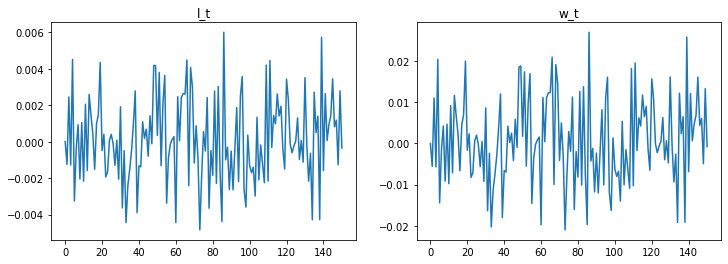

In [323]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(l_list_st)
plt.title('l_t')

plt.subplot(122)  
plt.plot(w_list_st)
plt.title('w_t')


plt.show()

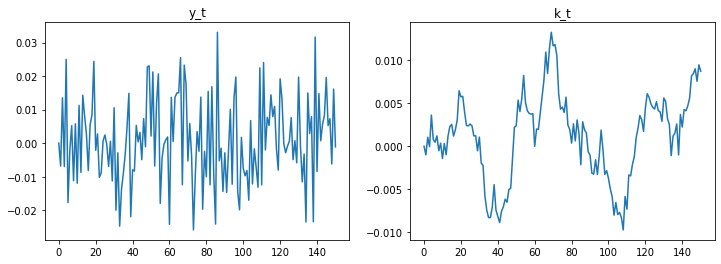

In [325]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(y_list_st)
plt.title('y_t')

plt.subplot(122)  
plt.plot(k_list_st)
plt.title('k_t')



plt.show()

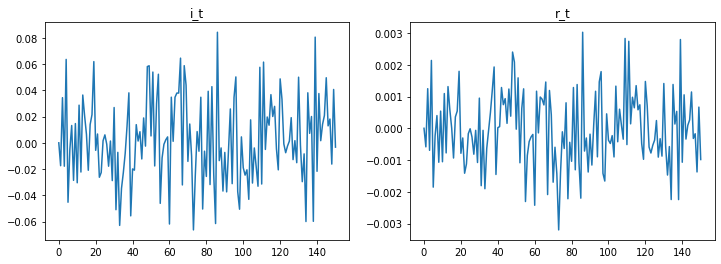

In [326]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(i_list_st)
plt.title('i_t')

plt.subplot(122)  
plt.plot(r_list_st)
plt.title('r_t')



plt.show()

Text(0.5, 1.0, 'c_t')

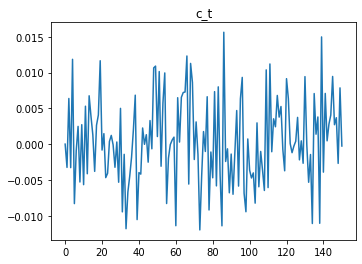

In [327]:
fig, ax = plt.subplots()

fig.set_figheight(4)
fig.set_figwidth(12)

plt.subplot(121)  
plt.plot(c_list_st)
plt.title('c_t')

In [285]:
np.var(C_t)/np.var(Y_t)

0.2417027595104488

In [288]:
np.var(I_t)/np.var(Y_t)

6.8833943798610875

In [290]:
PCEC = pd.read_excel('PCEC.xls', skiprows = 10) # US consumption
PCEC

,observation_date,PCEC
0,1947-01-01,156.161
1,1947-04-01,160.031
2,1947-07-01,163.543
3,1947-10-01,167.672
4,1948-01-01,170.372
...,...,...
298,2021-07-01,16147.297
299,2021-10-01,16517.976
300,2022-01-01,16874.769
301,2022-04-01,17261.338


In [291]:
np.var(PCEC['PCEC'])/np.var(GDP['GDP'])

0.46457338424531164

In [292]:
GPDI = pd.read_excel('GPDI.xls', skiprows = 10) # US investment
GPDI

,observation_date,GPDI
0,1947-01-01,35.854
1,1947-04-01,34.505
2,1947-07-01,34.911
3,1947-10-01,43.250
4,1948-01-01,47.202
...,...,...
298,2021-07-01,4109.122
299,2021-10-01,4499.171
300,2022-01-01,4671.027
301,2022-04-01,4609.927


In [293]:
np.var(GPDI['GPDI'])/np.var(GDP['GDP'])

0.03050771341771172

In [389]:
cons_cycle,cons_trend = hpfilter(np.log(PCEC['PCEC']), lamb=1600)
inv_cycle, inv_trend = hpfilter(np.log(GPDI['GPDI']), lamb=1600)

Text(0.5, 1.0, 'cycle of log-US consumption')

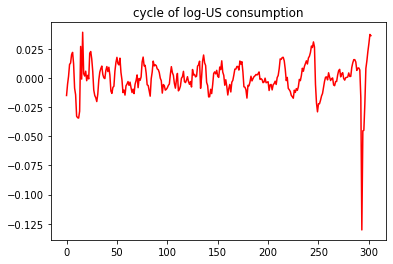

In [399]:
plt.plot(cons_cycle, c = 'red')
plt.title('cycle of log-US consumption')

Text(0.5, 1.0, 'cycle of log-US investment')

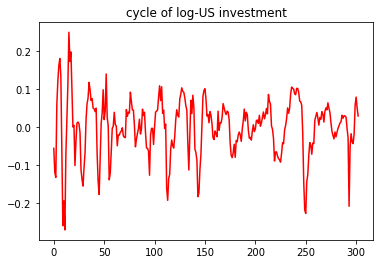

In [400]:
plt.plot(inv_cycle, c = 'red')
plt.title('cycle of log-US investment')

In [404]:
pd.DataFrame({' ': ['Volatility of investment', 'Volatility of consumption'],
             'US Data': [np.var(inv_cycle)/np.var(gdp_cycle), np.var(cons_cycle)/np.var(gdp_cycle)],
             'Sample': [np.var(i_list_st)/np.var(y_list_st), np.var(c_list_st)/np.var(y_list_st)]})

,,US Data,Sample
0,Volatility of investment,16.141925,6.467074
1,Volatility of consumption,0.594838,0.224995
